# 1. Introduction to KNN Algorithm
The k-Nearest Neighbors (kNN) algorithm is a simple, non-parametric, instance-based learning method.

It is used for both classification and regression problems.

### How kNN Works:
It stores all available cases (training data).

For a new input, it looks for the k nearest neighbors based on a distance metric (usually Euclidean distance).

### It predicts:

For Classification: the majority class among neighbors.

For Regression: the average of neighbors' target values.

### Key properties:

No model training (lazy learner).

Sensitive to feature scales.

Choice of k and distance metric is important for performance.

# 2. Identify the Type of Problem

# heart_failure_clinical_records using KNN Algorithms
We will solve the problems:

Problem : Predict DEATH_EVENT (0 = survived, 1 = died) → Binary Classification.

Thus:

Classification → Use KNeighborsClassifier()

# 3. import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve,
    mean_squared_error, mean_absolute_error, r2_score
)

# 4. Data Selection and import the Dataset

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
253,70.0,0,88,1,35,1,236000.00,1.2,132,0,0,215,0
182,65.0,0,395,1,25,0,265000.00,1.2,136,1,1,154,1
236,75.0,0,119,0,50,1,248000.00,1.1,148,1,0,209,0
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
216,70.0,0,1202,0,50,1,358000.00,0.9,141,0,0,196,0


# 5.EDA (Exploratory data Analysis)

In [4]:
df.shape

(299, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

- ➔ Observation: No missing values.

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# 6. Data Visualization

### Distribution of targated variable of classification problem(death event)

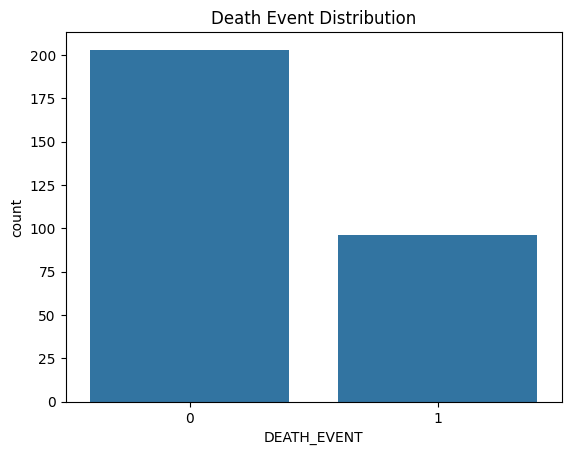

In [9]:
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Death Event Distribution')
plt.show()

# 7. Declare Feature Matrix and Target Vector 

In [10]:
X_clf = df.drop("DEATH_EVENT", axis = 1)   ## For Classification
y_clf = df["DEATH_EVENT"]

# 8. Split the Dataset

In [11]:
# Classification Split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# 9.Feature Engineering (if needed)
Handle:
● Missing values
● Encoding categorical variables

- No missing values. ✅ No categorical columns → No encoding needed.

# 10. Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_clf_scaled = scaler.fit_transform(X_train_clf)  ## For Classification
X_test_clf_scaled = scaler.transform(X_test_clf)

# Classification: Predict DEATH_EVENT

## 11. Train the model

In [13]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_clf_scaled, y_train_clf)

KNeighborsClassifier(n_neighbors=3)

## 12. make prediction

In [14]:
y_pred_clf =knn_clf.predict(X_test_clf_scaled)

## 13.Evaluate the Model
- accuracy_score

In [15]:
print("Accuracy :", accuracy_score(y_test_clf, y_pred_clf))

Accuracy : 0.7333333333333333


- confusion_matrix

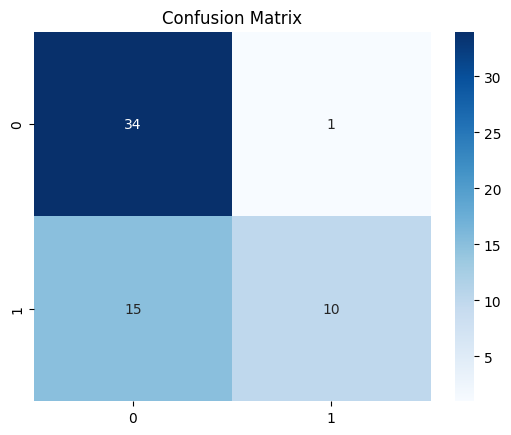

In [16]:
cm = confusion_matrix(y_test_clf, y_pred_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

- classification_report

In [17]:
print(classification_report(y_test_clf, y_pred_clf))

              precision    recall  f1-score   support

           0       0.69      0.97      0.81        35
           1       0.91      0.40      0.56        25

    accuracy                           0.73        60
   macro avg       0.80      0.69      0.68        60
weighted avg       0.78      0.73      0.70        60



- ROC AUC Score

In [18]:
y_proba = knn_clf.predict_proba(X_test_clf_scaled)[:,1]
print("ROC AUC Score:", roc_auc_score(y_test_clf, y_proba))

ROC AUC Score: 0.7188571428571429


-  ROC Curve

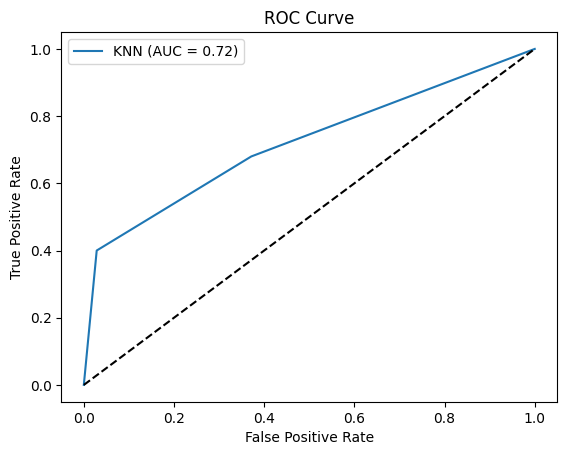

In [19]:
fpr, tpr, thresholds = roc_curve(y_test_clf, y_proba)
plt.plot(fpr, tpr, label="KNN (AUC = {:.2f})".format(roc_auc_score(y_test_clf, y_proba)))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

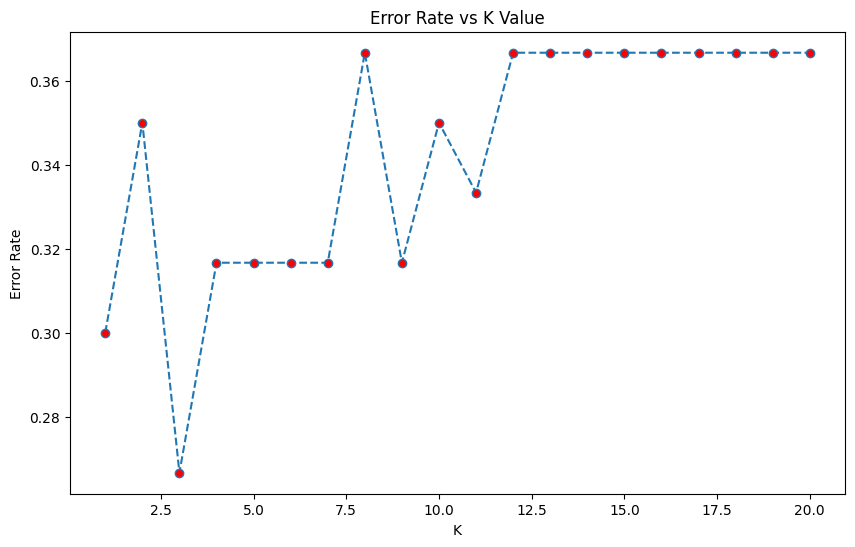

In [20]:
error_rates = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_clf_scaled, y_train_clf)
    pred_k = knn.predict(X_test_clf_scaled)
    error_rates.append(np.mean(pred_k != y_test_clf))

# Plot
plt.figure(figsize=(10,6))
plt.plot(range(1,21), error_rates, marker='o', linestyle='dashed', markerfacecolor='red')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


# 15.k-Fold Cross Validation
- for classification

In [21]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn_cv, X_train_clf_scaled, y_train_clf, cv=5, scoring='accuracy')
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())

Cross Validation Scores: [0.77083333 0.66666667 0.8125     0.70833333 0.70212766]
Average CV Score: 0.7320921985815604


# Results and Conclusion

| Problem | Best K | Final Metric |
|:--------|:-------|:--------|
| Classification (DEATH_EVENT) | (e.g., k=3) | Accuracy, ROC AUC |

-  Best K is chosen based on the elbow curve or highest CV score.
-  Scaling features helped improve model performance.
-  KNN is sensitive to feature scaling and choice of K.

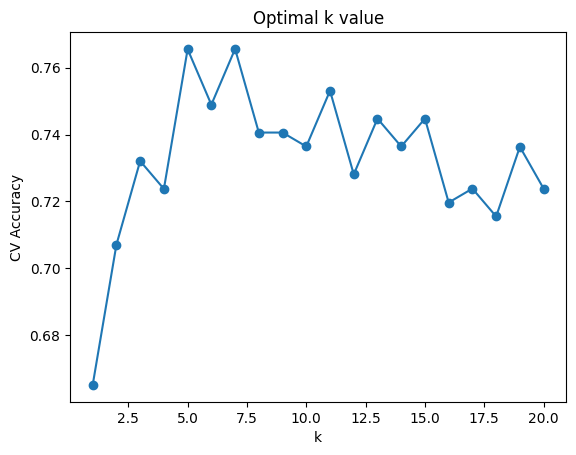

In [22]:
from sklearn.model_selection import cross_val_score

k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_clf_scaled, y_train_clf, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('k')
plt.ylabel('CV Accuracy')
plt.title('Optimal k value')
plt.show()
